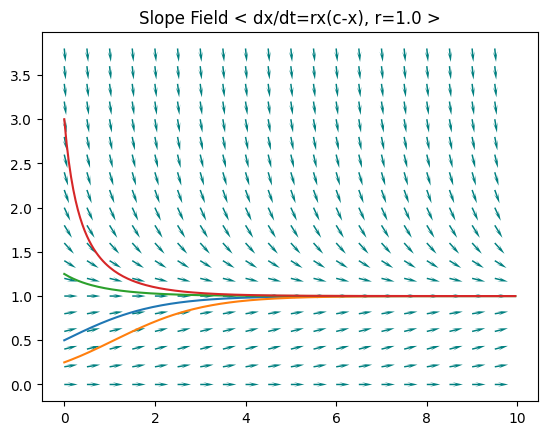

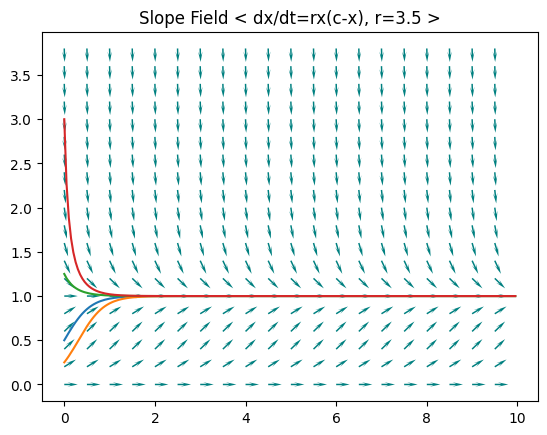

In [17]:
#import numpy as np
from chaotick import runge_kutta_4 as rk4, np as np
from chaotick import logistic_equation
import chaotick

x_interval = [0, 10]
y_interval = [0, 4]
step = 0.05
init_vals = [0.5, 0.25, 1.25, 3]

r1 = 1.0
r2 = 3.5
eqn_label = 'rx(c-x), r=%.1f' % r1
eqn_label2 = 'rx(c-x), r=%.1f' % r2

x = chaotick.np.arange(x_interval[0], x_interval[1], step)
curves = []
for init_val in init_vals:
    y = rk4(lambda x: logistic_equation(x, r=r1), range=x_interval, step=step, init_val=init_val)
    curves.append([x,y])
curves2 = []
for init_val in init_vals:
    y = rk4(lambda x: logistic_equation(x, r=r2), range=x_interval, step=step, init_val=init_val)
    curves2.append([x,y])

plt = chaotick.plot_slope_field(x_interval, y_interval, lambda x: logistic_equation(x, r=r1), normalized=True, curves=curves, title='Slope Field < dx/dt=%s >' % eqn_label)
plt = chaotick.plot_slope_field(x_interval, y_interval, lambda x: logistic_equation(x, r=r2), normalized=True, curves=curves2, title='Slope Field < dx/dt=%s >' % eqn_label2)


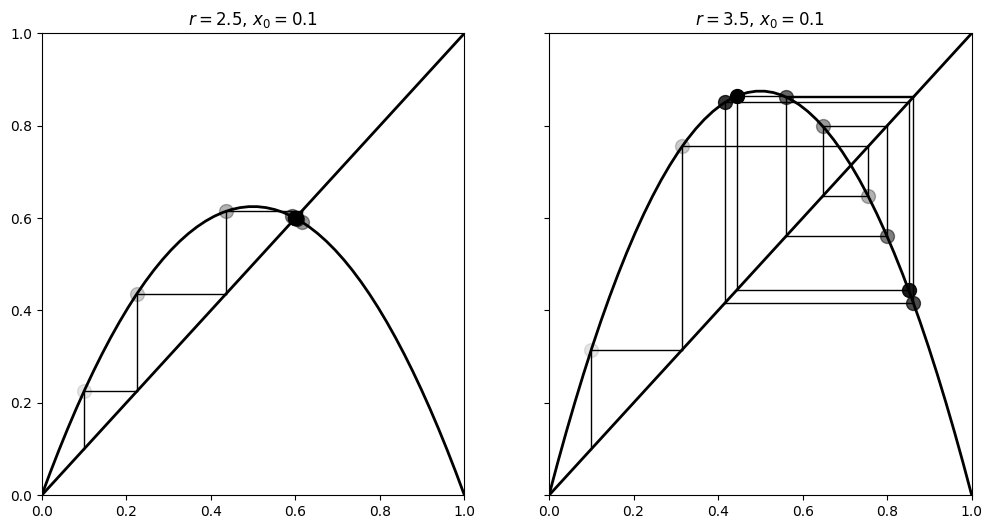

In [ ]:
fig, (ax1, ax2) = chaotick.plt.subplots(1, 2, figsize=(12, 6),
                               sharey=True)
chaotick.plot_system(2.5, .1, 10, ax=ax1)
chaotick.plot_system(3.5, .1, 10, ax=ax2)